In [1]:
import os
import sys
sys.path.append(os.path.abspath('../../'))

from diss3_code.signal import smooth_component_analysis as sca
from diss3_code.database import get_db_data as gdd
from diss3_code.coupling.triad import triad

In [2]:
from importlib import reload
reload(sca)
#reload(triad)
import numpy as np
import pandas as pd

from scipy.stats import zscore
import matplotlib.pyplot as plt

import seaborn as sns


In [4]:
A_groups = [1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
                          1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051]

B_groups = [1014, 1016, 1019, 1020, 1022,   1025, 1026, 1027, 1029, 1030]

groups = A_groups+B_groups

In [5]:
sago = sca.savitzky_golay(groups, 21,11,4,3)

In [6]:
df= sago.get_aligned_signal_componets()

x range: 4.5 236.5


In [7]:
tr = {gr: triad(df, gr, 'Sg_') for gr in A_groups+B_groups}

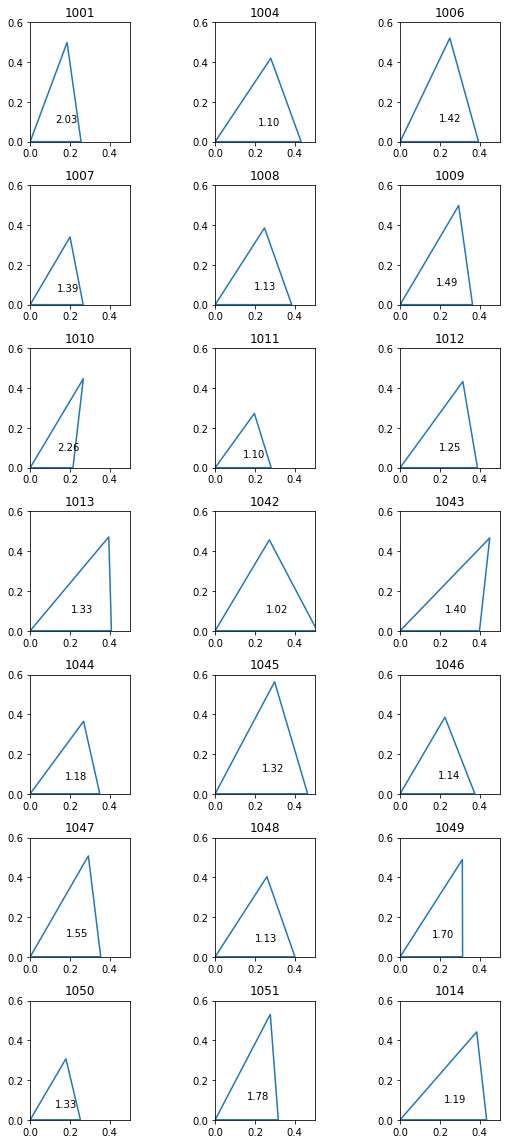

In [12]:
plt.subplots(7,3, figsize=(8,16))

for i,(grp, t) in enumerate(tr.items()):
    ax = plt.subplot(7,3,i+1)
    points = t.to_triangle(True)
    plt.plot(*points)
    ax.set_aspect('equal')
    ax.set_xlim(0,0.5)
    ax.set_ylim(0,0.6)
    plt.title("{}".format(grp))
    plt.text(points[0].max()/2, points[1].max()*0.2,"{:.2f}".format(t.triangle_ratio))
    if i==20:
        break
        
plt.tight_layout()

In [13]:
df_sg = df[[col for col in df.columns if col[1].startswith('Sg_')]]

df_sg.head()

1001                          1004                          1006  \
     Sg_101    Sg_102    Sg_103    Sg_110    Sg_111    Sg_112    Sg_116   
0  0.582206 -0.661958 -0.543228 -1.659590  0.415451  0.955206  0.432087   
1  0.571139 -0.739321 -0.697498 -1.650798  0.399557  0.910007  0.347186   
2  0.560073 -0.816685 -0.851767 -1.642007  0.383663  0.864809  0.262285   
3  0.549006 -0.894049 -1.006036 -1.633215  0.367769  0.819611  0.177384   
4  0.537940 -0.971413 -1.160306 -1.624424  0.351874  0.774413  0.092483   

                           1007  ...      1026      1027                      \
     Sg_117    Sg_118    Sg_119  ...    Sg_178    Sg_179    Sg_180    Sg_181   
0 -0.895123  0.047302 -1.968629  ...  1.206227  0.421084 -1.213918 -0.720026   
1 -0.854777  0.034897 -1.996948  ...  1.216705  0.400445 -1.197590 -0.759789   
2 -0.814430  0.022492 -2.025267  ...  1.227182  0.379805 -1.181261 -0.799552   
3 -0.774084  0.010086 -2.053585  ...  1.237660  0.359166 -1.164933 -0.839316   
4 -0.733738 -0.002319 -2.081904  ...  1.248138  0.338527 -1.148604 -0.879079   

       1029                          1030                      
     Sg_185    Sg_186    Sg_187    Sg_188    Sg_189    Sg_190  
0  1.305389 -0.023662  0.482593  0.663520  0.758874 -0.047572  
1  1.275806 -0.043197  0.382409  0.627162  0.709865 -0.052172  
2  1.246222 -0.062733  0.282225  0.590805  0.660856 -0.056771  
3  1.216639 -0.082268  0.182041  0.554447  0.611847 -0.061370  
4  1.187056 -0.101804  0.081858  0.518089  0.562838 -0.065969  

[5 rows x 90 columns]

In [14]:
df_sg.corr()

1001                          1004                      \
               Sg_101    Sg_102    Sg_103    Sg_110    Sg_111    Sg_112   
1001 Sg_101  1.000000 -0.012278 -0.101538 -0.003732 -0.323676  0.276176   
     Sg_102 -0.012278  1.000000  0.693945 -0.185827 -0.375218 -0.250342   
     Sg_103 -0.101538  0.693945  1.000000 -0.015613 -0.425250 -0.345725   
1004 Sg_110 -0.003732 -0.185827 -0.015613  1.000000  0.210432 -0.012798   
     Sg_111 -0.323676 -0.375218 -0.425250  0.210432  1.000000  0.168019   
...               ...       ...       ...       ...       ...       ...   
1029 Sg_186 -0.090402 -0.539738 -0.213071  0.209769  0.440110  0.200120   
     Sg_187 -0.280913  0.018388  0.150299  0.293151  0.153505  0.067186   
1030 Sg_188  0.313676 -0.120402 -0.197133 -0.049322 -0.175906 -0.211874   
     Sg_189  0.360920 -0.214968 -0.043753 -0.203376  0.047037 -0.011589   
     Sg_190 -0.254676  0.155817  0.118774 -0.092094 -0.312349 -0.266147   

                 1006                          1007  ...      1026      1027  \
               Sg_116    Sg_117    Sg_118    Sg_119  ...    Sg_178    Sg_179   
1001 Sg_101 -0.201781  0.064558 -0.211781 -0.146700  ... -0.269826  0.099503   
     Sg_102  0.429438  0.122527  0.201384  0.227072  ...  0.091075 -0.272910   
     Sg_103  0.318684  0.140329  0.161270  0.261480  ... -0.106143 -0.027512   
1004 Sg_110  0.269051  0.092658  0.017179  0.461153  ...  0.037934  0.048298   
     Sg_111  0.063090 -0.204190 -0.188649 -0.034429  ...  0.263700  0.157289   
...               ...       ...       ...       ...  ...       ...       ...   
1029 Sg_186 -0.147669 -0.384222 -0.322229  0.113714  ... -0.068855  0.117025   
     Sg_187  0.264441  0.108716  0.161632  0.167308  ... -0.008116 -0.030932   
1030 Sg_188 -0.005571 -0.076548 -0.131975 -0.051331  ... -0.221941 -0.137550   
     Sg_189 -0.161484 -0.215606 -0.113336 -0.208989  ... -0.130174  0.208319   
     Sg_190 -0.125778  0.461846  0.518559 -0.062797  ... -0.107349  0.206229   

                                     1029                          1030  \
               Sg_180    Sg_181    Sg_185    Sg_186    Sg_187    Sg_188   
1001 Sg_101 -0.095328  0.066255  0.622277 -0.090402 -0.280913  0.313676   
     Sg_102  0.002106  0.041038 -0.307528 -0.539738  0.018388 -0.120402   
     Sg_103  0.016891 -0.009829 -0.286302 -0.213071  0.150299 -0.197133   
1004 Sg_110  0.481042  0.499254 -0.172060  0.209769  0.293151 -0.049322   
     Sg_111 -0.032377  0.066749 -0.008725  0.440110  0.153505 -0.175906   
...               ...       ...       ...       ...       ...       ...   
1029 Sg_186 -0.156325 -0.292502  0.183266  1.000000  0.069213  0.010519   
     Sg_187  0.166178  0.188098 -0.085268  0.069213  1.000000  0.141596   
1030 Sg_188 -0.312072 -0.236713  0.416517  0.010519  0.141596  1.000000   
     Sg_189 -0.530078 -0.384788  0.474514  0.302969 -0.023637  0.477952   
     Sg_190  0.321102  0.289649 -0.321183 -0.500413 -0.000734 -0.126622   

                                 
               Sg_189    Sg_190  
1001 Sg_101  0.360920 -0.254676  
     Sg_102 -0.214968  0.155817  
     Sg_103 -0.043753  0.118774  
1004 Sg_110 -0.203376 -0.092094  
     Sg_111  0.047037 -0.312349  
...               ...       ...  
1029 Sg_186  0.302969 -0.500413  
     Sg_187 -0.023637 -0.000734  
1030 Sg_188  0.477952 -0.126622  
     Sg_189  1.000000 -0.290220  
     Sg_190 -0.290220  1.000000  

[90 rows x 90 columns]

In [55]:
df_dist = df_sg.corr().apply(lambda x: np.arccos(x)/np.pi)
df_dist.head()

1001                          1004                      \
               Sg_101    Sg_102    Sg_103    Sg_110    Sg_111    Sg_112   
1001 Sg_101  0.000000  0.503908  0.532376  0.501188  0.604919  0.410933   
     Sg_102  0.503908  0.000000  0.255871  0.559496  0.622432  0.580543   
     Sg_103  0.532376  0.255871  0.000000  0.504970  0.639814  0.612367   
1004 Sg_110  0.501188  0.559496  0.504970  0.000000  0.432513  0.504074   
     Sg_111  0.604919  0.622432  0.639814  0.432513  0.000000  0.446263   

                 1006                          1007  ...      1026      1027  \
               Sg_116    Sg_117    Sg_118    Sg_119  ...    Sg_178    Sg_179   
1001 Sg_101  0.564673  0.479436  0.567926  0.546865  ...  0.586966  0.468275   
     Sg_102  0.358712  0.460900  0.435456  0.427085  ...  0.470970  0.587986   
     Sg_103  0.396759  0.455184  0.448441  0.415789  ...  0.533850  0.508758   
1004 Sg_110  0.413290  0.470464  0.494531  0.347436  ...  0.487922  0.484620   
     Sg_111  0.479905  0.565456  0.560411  0.510961  ...  0.415057  0.449725   

                                     1029                          1030  \
               Sg_180    Sg_181    Sg_185    Sg_186    Sg_187    Sg_188   
1001 Sg_101  0.530390  0.478895  0.286208  0.528815  0.590637  0.398440   
     Sg_102  0.499330  0.486933  0.599502  0.681477  0.494147  0.538418   
     Sg_103  0.494623  0.503129  0.592426  0.568347  0.451976  0.563163   
1004 Sg_110  0.340259  0.333607  0.555042  0.432729  0.405296  0.515706   
     Sg_111  0.510308  0.478737  0.502777  0.354939  0.450944  0.556286   

                                 
               Sg_189    Sg_190  
1001 Sg_101  0.382463  0.581969  
     Sg_102  0.568965  0.450199  
     Sg_103  0.513931  0.462104  
1004 Sg_110  0.565191  0.529356  
     Sg_111  0.485022  0.601116  

[5 rows x 90 columns]

In [56]:
np.random.seed(4401)
n_cols = len(df_dist.columns)

n_samples = 5000
my_samples = np.vstack([np.random.choice(n_cols,3,replace=False) for _ in range(n_samples)])

my_samples.shape

(5000, 3)

In [151]:
dist_mat = df_dist.values
all_dists = []
for sample in my_samples:
    dists = sorted([dist_mat[sample[i],sample[j]] for i, j in [(0,1), (0,2), (1,2)]])
    dists = [dists[0], (dists[1]+dists[2])/2]
    dists.append(dists[1]/dists[0])
    dists.append(np.log(dists[-1]))
    all_dists.append(dists)
    
all_dists = np.vstack(all_dists)


all_dists.shape

(5000, 4)

In [152]:
mstd = all_dists.mean(axis=0),all_dists.std(axis=0)

mstd

(array([0.4220583 , 0.53688944, 1.29362201, 0.24539197]),
 array([0.06095896, 0.05934061, 0.21538282, 0.15056067]))

/home/siegman/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/siegman/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

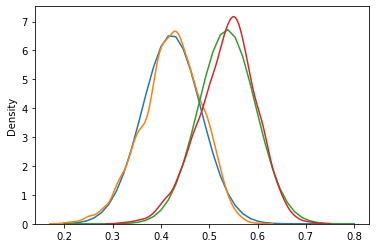

In [94]:
%matplotlib inline
from scipy.stats import norm
x = np.linspace(0.2, 0.8, 40)
plt.plot(x, norm.pdf(x,mstd[0][0], mstd[1][0]) )
sns.distplot(all_dists[:,0],hist=False)

plt.plot(x, norm.pdf(x,mstd[0][1], mstd[1][1]) )

sns.distplot(all_dists[:,1],hist=False)


/home/siegman/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

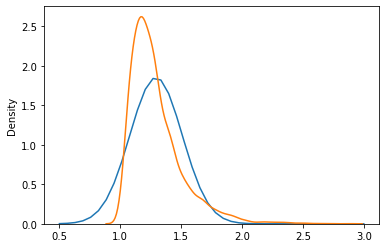

In [156]:
%matplotlib inline
from scipy.stats import norm
x = np.linspace(0.5, 3, 40)
plt.plot(x, norm.pdf(x,mstd[0][2], mstd[1][2]) )
sns.distplot(all_dists[:,2],hist=False)



In [157]:
min_edge_percentile = lambda xx: np.interp(xx, sorted(all_dists[:,0]), np.linspace(0,1,all_dists.shape[0]))

long_edges_percentile = lambda xx: np.interp(xx, sorted(all_dists[:,1]), np.linspace(0,1,all_dists.shape[0]))

ratio_percentile =  lambda xx: np.interp(xx, sorted(all_dists[:,2]), np.linspace(0,1,all_dists.shape[0]))

In [60]:
ranks = {}
for gr in groups:
    small_df = df_dist.loc[gr,gr]
    distances_in_group = sorted([small_df.iloc[i,j] for (i,j) in [(0,1),(1,2),(0,2)]])
    #print(gr, distances_in_group)
    #break
    distances_in_group = [distances_in_group[0], (distances_in_group[1]+distances_in_group[2])/2]
    ranks[gr] = tuple(distances_in_group), (min_edge_percentile(distances_in_group[0]), long_edges_percentile(distances_in_group[1]))

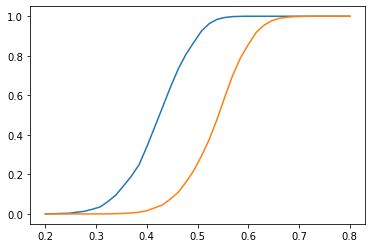

In [63]:
x = np.linspace(0.2, 0.8, 40)
plt.plot(x,min_edge_percentile(x))
plt.plot(x,long_edges_percentile(x))

In [64]:
ranks

{1001: ((0.2558710801661403, 0.518142354097437),
  (0.008601720344068814, 0.3503603544648621)),
 1004: ((0.4325130454965017, 0.475168352181718),
  (0.5531657878470002, 0.15559888871283717)),
 1006: ((0.3943011919360043, 0.5591842021277098),
  (0.30306061212242447, 0.6329222419440597)),
 1007: ((0.2665271436680593, 0.3710835135992935),
  (0.010202040408081616, 0.005264086212769151)),
 1008: ((0.3851627435962708, 0.43406640452065853),
  (0.2513826824071529, 0.049771770663869355)),
 1009: ((0.3642072188507619, 0.5414144283486064),
  (0.17543508701740348, 0.5019275622674607)),
 1010: ((0.21522179478010472, 0.486106144247269),
  (0.001200240048009602, 0.19459218424585084)),
 1011: ((0.28189080788176146, 0.31130936472098425),
  (0.016603320664132826, 0.0)),
 1012: ((0.38896783168385035, 0.48798327211705683),
  (0.2768553710742148, 0.2009421520752323)),
 1013: ((0.40866328813121167, 0.5438746872126186),
  (0.3940788157631526, 0.5161700829526434)),
 1042: ((0.5134591404181754, 0.52427149006939

In [65]:
pts = np.vstack([v[1] for v in ranks.values()])
pts

array([[8.60172034e-03, 3.50360354e-01],
       [5.53165788e-01, 1.55598889e-01],
       [3.03060612e-01, 6.32922242e-01],
       [1.02020404e-02, 5.26408621e-03],
       [2.51382682e-01, 4.97717707e-02],
       [1.75435087e-01, 5.01927562e-01],
       [1.20024005e-03, 1.94592184e-01],
       [1.66033207e-02, 0.00000000e+00],
       [2.76855371e-01, 2.00942152e-01],
       [3.94078816e-01, 5.16170083e-01],
       [9.42788558e-01, 3.83324211e-01],
       [3.36267253e-01, 6.35434834e-01],
       [1.26625325e-01, 2.79270648e-02],
       [7.53350670e-01, 9.07859329e-01],
       [2.12442488e-01, 4.47130795e-02],
       [1.47029406e-01, 5.52923313e-01],
       [3.52070414e-01, 8.85497923e-02],
       [4.86097219e-02, 4.55763780e-01],
       [7.20144029e-03, 1.11993216e-03],
       [5.44108822e-02, 6.75633457e-01],
       [5.74514903e-01, 3.36825417e-01],
       [8.62262647e-01, 8.33028908e-01],
       [2.10042008e-02, 3.36748646e-02],
       [1.24024805e-02, 6.44534968e-01],
       [1.558311

<IPython.core.display.Javascript object>


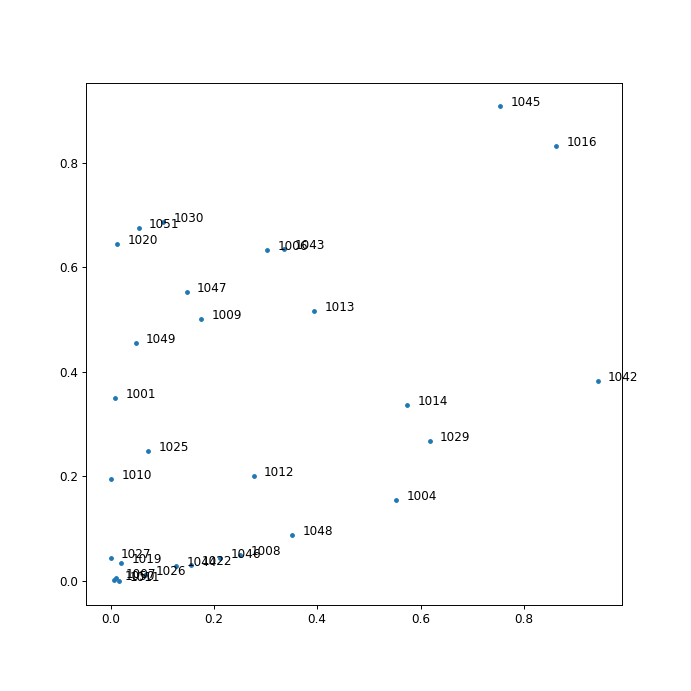

In [95]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(pts[:,0],pts[:,1],'.')
for gr, p in ranks.items():
    p = p[1]
    plt.text(p[0]+0.02,p[1],str(gr))
    

In [81]:
tp = pd.DataFrame(columns = ['short', 'long'],data=[v[1] for v in ranks.values()])<0.5
pd.crosstab(tp['short'],tp['long'])

long,False,True
short,,
False,2,4
True,8,16


In [193]:
rank_df = pd.DataFrame(data=[(k,*v[0],*v[1]) for k,v in ranks.items()], 
                        columns = 'group,short_dist,long_dist,short_p,long_p'.split(','))

rank_df['rat'] = rank_df.long_dist/rank_df.short_dist
rank_df['rat_recip'] = 1/rank_df.rat
rank_df['rat_p'] = ratio_percentile (rank_df.rat)
rank_df['short_q'] = rank_df.short_p//0.1
rank_df['long_q'] = rank_df.long_p//0.1
rank_df['rat_q'] = rank_df.rat_p//0.1
# ranks_df['type'] = ranks_df.apply(
#     lambda r: r.short_p<0.5 and r.long_p <0.5 and 'tight-3' or 
#         r.short_p >= 0.5 and r.long_p <= 0.5 and 'good-3' or
#         r.short_p <0.5 and r.long_p >= 0.4 and 'good-2' or 'uncoupled'
#     , axis=1)

# rank_df['type'] = rank_df.apply(
#     lambda r: {
#         (0,0): 'tight 3',
#         (0,1): 'tight 2+',
#         (0,2): 'tight 2',
#         (1,0): 'good 3',
#         (1,1): 'neutral',
#         (1,2): 'neutral',
#         (1,3): 'good 2',
#         (2,2): 'uncoupled'
#     }.get((r.short_q, r.long_q),'other'),axis=1)
rank_df.sort_values('long_p',ascending=False)

,group,short_dist,long_dist,short_p,long_p,rat,rat_recip,rat_p,short_q,long_q,rat_q
13,1045,0.465221,0.612606,0.753351,0.907859,1.316808,0.759412,0.662925,7.0,9.0,6.0
21,1016,0.490573,0.593327,0.862263,0.833029,1.209459,0.826816,0.420849,8.0,8.0,4.0
29,1030,0.341379,0.567071,0.101620,0.686543,1.661117,0.602004,0.933613,1.0,6.0,9.0
19,1051,0.317579,0.565504,0.054411,0.675633,1.780672,0.561586,0.963463,0.0,6.0,9.0
23,1020,0.275723,0.560780,0.012402,0.644535,2.033855,0.491677,0.990403,0.0,6.0,9.0
11,1043,0.399341,0.559551,0.336267,0.635435,1.401185,0.713682,0.775825,3.0,6.0,7.0
2,1006,0.394301,0.559184,0.303061,0.632922,1.418165,0.705137,0.797275,3.0,6.0,7.0
15,1047,0.354984,0.548559,0.147029,0.552923,1.545306,0.647121,0.889328,1.0,5.0,8.0
9,1013,0.408663,0.543875,0.394079,0.516170,1.330863,0.751392,0.686338,3.0,5.0,6.0
5,1009,0.364207,0.541414,0.175435,0.501928,1.486556,0.672696,0.852814,1.0,5.0,8.0


In [202]:
rank_df['type1'] = rank_df.apply(lambda r: r.long_q == 0 and 'good' or r.long_q >= 5 and 'bad' or 'other', axis=1)
rank_df['type2'] = rank_df.apply(lambda r: r.rat_q <= 1 and 'equi' or r.rat_q >= 8 and 'pointy' or 'other', axis=1)

# rank_df['type'] = rank_df.apply(lambda r: '_'.join(sum([
#         ['good'] if r.long_q ==0 else [],
#         ['bad'] if r.long_q >= 5 else [],
#         ['equi'] if r.rat_q <= 1 else [],
#         ['point'] if r.rat_q >= 8 else []],[])),axis=1)
#rank_df.type.value_counts()


<AxesSubplot:xlabel='short_dist', ylabel='rat'>

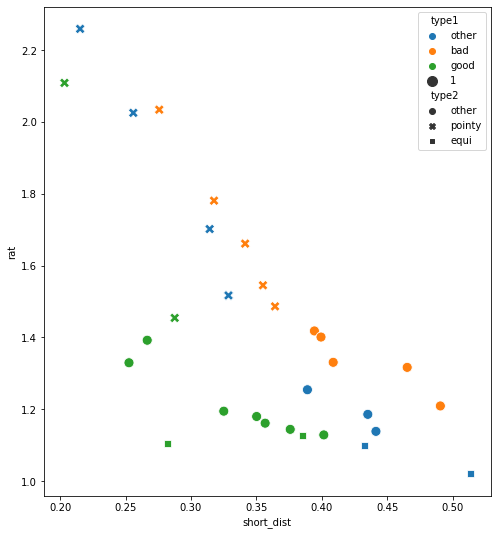

In [205]:
plt.figure(figsize=(8,9))
sns.scatterplot(data = rank_df, x='short_dist', y='rat', hue='type1',style='type2', 
                style_order = ['other','pointy','equi'],
                size=[1]*len(rank_df),
               sizes = [100])
# for gr, p,r  in zip(groups, pts, rats):
#     plt.text(p[0]+0.005, r, 
#              str(gr)) 


In [137]:
tr = {gr: triad(df, gr, 'Sg_') for gr in groups}

pts = np.vstack([v.point for v in tr.values()])

rats = [v.triangle_ratio for v in tr.values()]

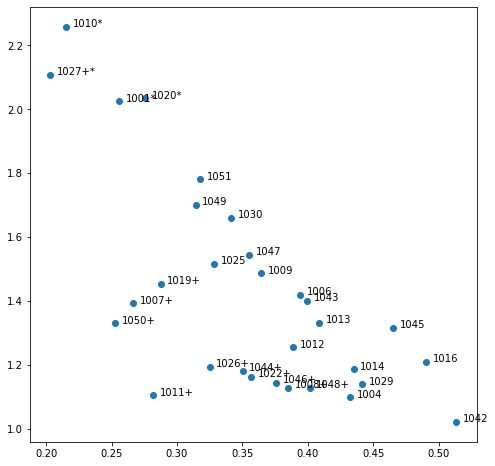

In [143]:
%matplotlib inline
plt.figure(figsize=(8,8))

plt.scatter(pts[:,0],rats)
#for gr, p, r in zip(A_groups, pts, rats):
#    plt.text(p[0]+0.005, r, str(gr))

for gr, p,r  in zip(groups, pts, rats):
    plt.text(p[0]+0.005, r, 
             str(gr) 
                 + ('+' if rank_df.set_index('group').loc[gr,'long_q']==0 else '') 
                 + ('*' if r > 1.8 else ''))
    
'''{
        'uncoupled':'r',
        'tight 3':'g',
        'good 3':   (0,0.8,0),
        'tight 2+': (0,0.0,0.9),
        'tight 2': (0.9,0.4,0.4),

        'other':     (0.5, 0.5, 0.5),
        'neutral': 'm',
        'uncoupled': (0.,0.,0.),
        
    }''';

In [112]:
{}.get(3)

In [127]:
not not (0., 0., 0.)

True